In [10]:
import matplotlib.pyplot as plt

In [1]:
import lib.data

In [2]:
PATH="/home/as/datasets/lily/deep-fashion"

In [3]:
df = lib.data.DeepFashion(PATH)

Reading data structures from:  fashion.db
Training images 209222
Validation images 40000
Test images 40000


In [4]:
ds = lib.data.DeepFashionDataset(df.train_imgs, PATH)

In [9]:
ds[1][0].shape

(300, 205, 3)

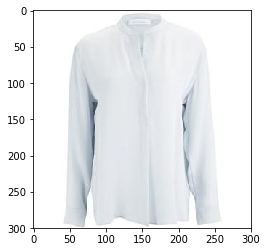

In [17]:
plt.imshow(ds[5001][0])